# Exploratory Data Analysis using Python: Global Under5 Death Rates

## Introduction  

Child mortality, particularly among children under age 5, is a critical indicator of a nation's overall health. This project aims to comprehensively analyze and understand the trends and causes of child deaths among children under the age of 5, specifically from 2000 to 2019. The chosen timeframe, spanning from 2000 to 2019, encapsulates a crucial period marked by advancements in healthcare, shifts in socioeconomic dynamics, and global efforts to mitigate child mortality.

##### Downloaded csv manually from website and extracted data from excel

In [1]:
import pandas as pd                                         
df = pd.read_excel("Global Under 5 Deaths.xlsx","deaths")
df.head()

,Indicator,Year,Country,Global,WHO region,World bank income group,Age group,Cause,Datasource short,Datasource long,Value Numeric,Value String
0,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Birth asphyxia and birth trauma,MCEE,Maternal and Child Epidemiology Estimation (MCEE),278103.80,278103.80
1,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Tetanus,MCEE,Maternal and Child Epidemiology Estimation (MCEE),20040.15,20040.15
2,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Injuries,MCEE,Maternal and Child Epidemiology Estimation (MCEE),51248.61,51248.61
3,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,HIV/AIDS,MCEE,Maternal and Child Epidemiology Estimation (MCEE),222929.00,222929.00
4,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Sepsis and other infectious conditions of the ...,MCEE,Maternal and Child Epidemiology Estimation (MCEE),96900.48,96900.48


## Problem Statement  

The problem at hand is to conduct an insightful analysis of child mortality among children under 5, from 2000 to 2019, with a particular focus on identifying and understanding the factors influencing child mortality rates across various dimensions:
- Year
- Cause
- World Bank Income Group
- WHO Region

## Python Libraries Used

- Pandas
- Matlplotlib
- Seaborn

## Data Transformation

In order to streamline the dataset and focus on the essential information, removing unwanted columns and irrelevant information always helps in good analysis, resulting in a refined dataset containing only the required columns for analysis
- Removing Value String, Age Group,Datasource Short,  and Datasource Long columns as they will be not used for analysis. Value string column consists same value as in Value Numeric column. The age group column consists of 0-4 that represents age, which is not required as the data set has data for under 5 children only. The data source column is not needed as it represents the source of data. .

In [2]:
df.shape # finding number of rows and columns

(56280, 12)

In [3]:
df.info() # information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56280 entries, 0 to 56279
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Indicator                56280 non-null  object 
 1   Year                     56280 non-null  int64  
 2   Country                  54320 non-null  object 
 3   Global                   280 non-null    object 
 4   WHO region               56280 non-null  object 
 5   World bank income group  53480 non-null  object 
 6   Age group                56280 non-null  object 
 7   Cause                    56280 non-null  object 
 8   Datasource short         56280 non-null  object 
 9   Datasource long          56280 non-null  object 
 10  Value Numeric            56280 non-null  float64
 11  Value String             56280 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 5.2+ MB


In [4]:
df.isna().sum().sort_values(ascending=False) # finding count of null values in columns 

Global                     56000
World bank income group     2800
Country                     1960
Indicator                      0
Year                           0
WHO region                     0
Age group                      0
Cause                          0
Datasource short               0
Datasource long                0
Value Numeric                  0
Value String                   0
dtype: int64

**There are 56000 null values in Global, 2800 in Income-group, and 1960 NA data in Country**

In [5]:
# Removing Value String, Age Group,Global,Datasource Short, and Datasource Long columns as they will be not used for analysis.
df.drop(columns=['Global','Datasource short','Datasource long','Value String','Age group'],inplace=True)
df.head()

,Indicator,Year,Country,WHO region,World bank income group,Cause,Value Numeric
0,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,Birth asphyxia and birth trauma,278103.80
1,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,Tetanus,20040.15
2,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,Injuries,51248.61
3,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,HIV/AIDS,222929.00
4,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,Sepsis and other infectious conditions of the ...,96900.48


In [6]:
df['WHO region'].value_counts()

WHO region
Europe                   15120
Africa                   13440
Americas                 10080
Western Pacific           7840
Eastern Mediterranean     6160
South-East Asia           3360
Global                     280
Name: count, dtype: int64

**Is global sum of other region's value numeric**  
**Check if global is sum of other regions value numerica**

In [7]:
Global = df[df['WHO region']=='Global']
Global_Sum = Global['Value Numeric'].sum()
Global_Sum

145207910.183

In [8]:
Non_Global = df[df['WHO region']!='Global']
Non_Global_Sum = Non_Global['Value Numeric'].sum()
Non_Global_Sum
#Global in WHO region total sum is 145207910
#All other WHO regions expect global total is 290415822 (ie.,145207910+145207910)
#Global is a combination of all the other regions so remove all the global from the dataset

290415822.7919204

- The WHO region column contains Global which is not part of WHO Regions. There are only six WHO Regions
 1.The African Region (AFRO)
 2.The Eastern Mediterranean Region (EMRO)
 3.The South-East Asia Region (SEARO)
 4.The Region of the Americas (AMRO)
 5.The Western Pacific Region (WPRO)
 6.European Region (EURO).
 Global data may represent all region's data or it is a part of some of the regions, hence removing the Global from the WHO Region column

In [9]:
df = df[df['WHO region'] != 'Global'] # Filtering out global records in WHO region
df.columns=['indicator','year','country','who_region','income_group','cause','death_rate'] # renaming columns
df

,indicator,year,country,who_region,income_group,cause,death_rate
0,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,Birth asphyxia and birth trauma,278103.80000
1,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,Tetanus,20040.15000
2,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,Injuries,51248.61000
3,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,HIV/AIDS,222929.00000
4,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,Sepsis and other infectious conditions of the ...,96900.48000
...,...,...,...,...,...,...,...
56275,Number of under-five deaths - by cause,2019,Zimbabwe,Africa,Lower middle income,Sepsis and other infectious conditions of the ...,661.51760
56276,Number of under-five deaths - by cause,2019,Zimbabwe,Africa,Lower middle income,HIV/AIDS,2104.11800
56277,Number of under-five deaths - by cause,2019,Zimbabwe,Africa,Lower middle income,Birth asphyxia and birth trauma,3001.16000
56278,Number of under-five deaths - by cause,2019,Zimbabwe,Africa,Lower middle income,Injuries,1329.72300


- Created a table to differentiate vaccine-preventable diseases(cause) and non-vaccine-preventable diseases(cause) in the excel with sheet name as cause_type. Such that more deeper analysis can be performed 

In [10]:
cause_type = pd.read_excel("Global Under 5 Deaths.xlsx","cause_type")
cause_type

,cause,Preventable
0,Measles,Vaccine_Preventable
1,Meningitis/encephalitis,Vaccine_Preventable
2,Tetanus,Vaccine_Preventable
3,Tuberculosis,Vaccine_Preventable
4,Diarrhoeal diseases,Vaccine_Preventable
5,Acute lower respiratory infections,Non_Vaccine_Preventable
6,Birth asphyxia and birth trauma,Non_Vaccine_Preventable
7,Congenital anomalies,Non_Vaccine_Preventable
8,HIV/AIDS,Non_Vaccine_Preventable
9,Injuries,Non_Vaccine_Preventable


In [11]:
deaths = df.merge(cause_type,on='cause') # Merging 
deaths.rename(columns={'Preventable':'preventable'},inplace=True) # Renaming Preventable column
deaths.head()

,indicator,year,country,who_region,income_group,cause,death_rate,preventable
0,Number of under-five deaths - by cause,2000,NaN,Africa,NaN,Birth asphyxia and birth trauma,278103.8,Non_Vaccine_Preventable
1,Number of under-five deaths - by cause,2001,NaN,Africa,NaN,Birth asphyxia and birth trauma,278862.5,Non_Vaccine_Preventable
2,Number of under-five deaths - by cause,2002,NaN,Africa,NaN,Birth asphyxia and birth trauma,279203.3,Non_Vaccine_Preventable
3,Number of under-five deaths - by cause,2003,NaN,Africa,NaN,Birth asphyxia and birth trauma,280235.4,Non_Vaccine_Preventable
4,Number of under-five deaths - by cause,2004,NaN,Africa,NaN,Birth asphyxia and birth trauma,280753.4,Non_Vaccine_Preventable


**'deaths' data frame is final output after cleaning and transforming data. It only has row and columns which are requried for performing analysis**

## Exploratory Analysis and Visualization
#### Columns we will analyse
- Year
- Cause
- WHO Region
- World Bank Income Group


### Year-Deaths

#### 1. Total death rates over the years

In [12]:
import matplotlib.pyplot as plt                  # importing libraries to create visuals
import seaborn as sns
plt.rcParams['figure.figsize'] = (7, 5)          # setting default size for all charts

year_deaths = deaths.groupby('year')['death_rate'].sum().reset_index() 
# grouping data by year to calculate total death_rate in the year
year_deaths['death_rate'] = round(year_deaths['death_rate'],2)   # rounding death_rate to two decimals
year_deaths['previous_year_death_rate'] = round(year_deaths['death_rate'].shift(1),2)
# using shift to fecth previous year death rate 
year_deaths['pct_decrease'] = round(
    (year_deaths['previous_year_death_rate']-year_deaths['death_rate']) *100/year_deaths['previous_year_death_rate'],2)
# 'decrease_pct' represents the percentage of decrease in death rate compared to the previous year).
year_deaths.fillna(0,inplace=True) # Replcaing NaN with 0
year_deaths

,year,death_rate,previous_year_death_rate,pct_decrease
0,2000,19835535.72,0.00,0.00
1,2001,19243534.40,19835535.72,2.98
2,2002,18526094.51,19243534.40,3.73
3,2003,18039026.62,18526094.51,2.63
4,2004,17420430.87,18039026.62,3.43
5,2005,16656475.23,17420430.87,4.39
6,2006,15924874.47,16656475.23,4.39
7,2007,15253639.50,15924874.47,4.22
8,2008,14832515.36,15253639.50,2.76
9,2009,14342209.77,14832515.36,3.31


##### Between 2000 and 2019 death rates had declined

Text(0.5, 1.0, 'Death Rate Over the Years')

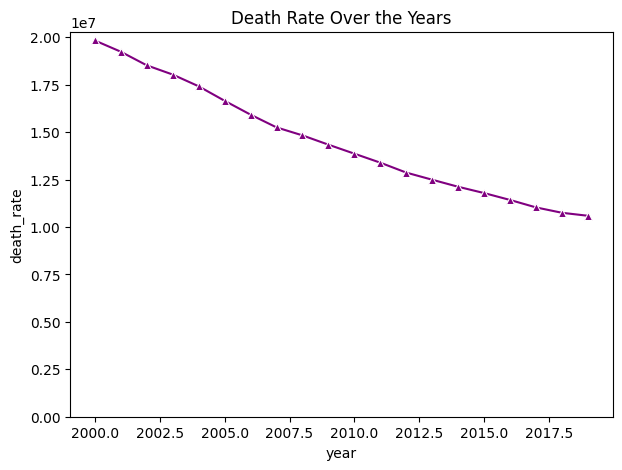

In [13]:
p = sns.lineplot(data=year_deaths,x='year',y='death_rate',estimator=sum,marker = "^",color='purple')
p.set_ylim(ymin=0)
plt.title("Death Rate Over the Years")



#### 2. Percentage decrease in death rates compared to the previous year

Text(0.5, 1.0, '% Decrease In Death Rate')

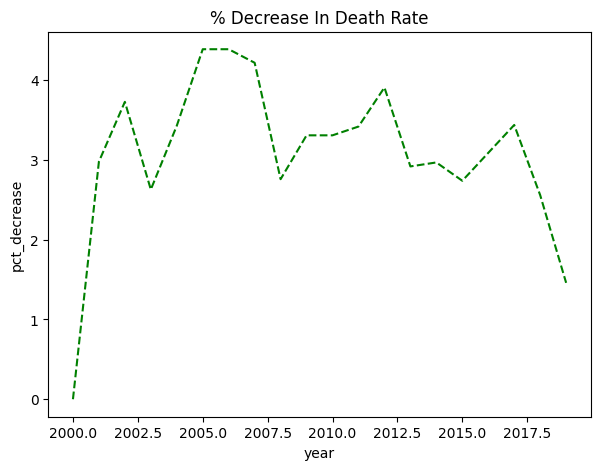

In [14]:
sns.lineplot(data=year_deaths,x='year',y='pct_decrease',color='green',linestyle='dashed')
plt.title('% Decrease In Death Rate')

##### The highest decrease in death rate percent was 4.39 in 2005 and 2006

#### 3. Disease that caused the highest death rates each year

In [15]:
max_deaths = deaths.loc[deaths.groupby('year')['death_rate'].idxmax()] 

Droping unwanted columns in max_deaths data frame

In [16]:
max_deaths = max_deaths.drop(columns=['indicator','country','who_region','income_group','preventable']) 
max_deaths

,year,cause,death_rate
40000,2000,Malaria,764140.3
40001,2001,Malaria,759150.0
40002,2002,Malaria,718068.3
40003,2003,Malaria,694540.3
40004,2004,Malaria,672826.6
40005,2005,Malaria,644756.0
40006,2006,Malaria,633079.4
40007,2007,Malaria,614444.2
40008,2008,Malaria,593381.1
40009,2009,Malaria,581720.4


##### From 2000 to 2009 Malaria was the cause for max death rates
##### From 2010 to 2019 Acute lower respiratory tract infection was the cause for max death rates

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015'),
  Text(16, 0, '2016'),
  Text(17, 0, '2017'),
  Text(18, 0, '2018'),
  Text(19, 0, '2019')])

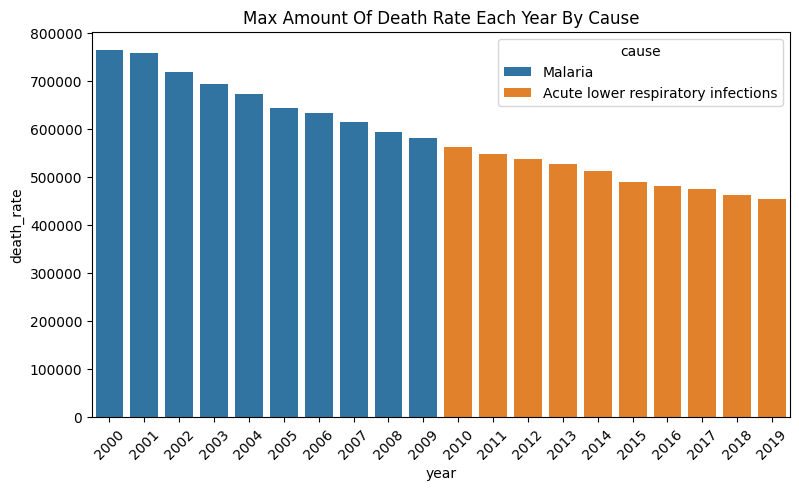

In [17]:
plt.figure(figsize=(9,5))
sns.barplot(x='year',y='death_rate',data=max_deaths,hue='cause')
plt.title("Max Amount Of Death Rate Each Year By Cause")
plt.xticks(rotation=45)

#### 4. Death rates by preventable cause over the years

In [18]:
year_cause_deaths = deaths[deaths['preventable']=='Vaccine_Preventable']
year_cause_deaths = year_cause_deaths[['year','country','who_region','cause','death_rate']]
year_cause_deaths

,year,country,who_region,cause,death_rate
4000,2000,NaN,Africa,Tetanus,20040.150
4001,2001,NaN,Africa,Tetanus,18818.680
4002,2002,NaN,Africa,Tetanus,17266.540
4003,2003,NaN,Africa,Tetanus,15696.630
4004,2004,NaN,Africa,Tetanus,14004.790
...,...,...,...,...,...
51995,2015,Zimbabwe,Africa,Diarrhoeal diseases,2285.684
51996,2016,Zimbabwe,Africa,Diarrhoeal diseases,2091.532
51997,2017,Zimbabwe,Africa,Diarrhoeal diseases,1892.406
51998,2018,Zimbabwe,Africa,Diarrhoeal diseases,1960.905


Text(0.5, 1.0, 'Death Rates By Preventable Cause Over The Years')

<Figure size 1500x500 with 0 Axes>

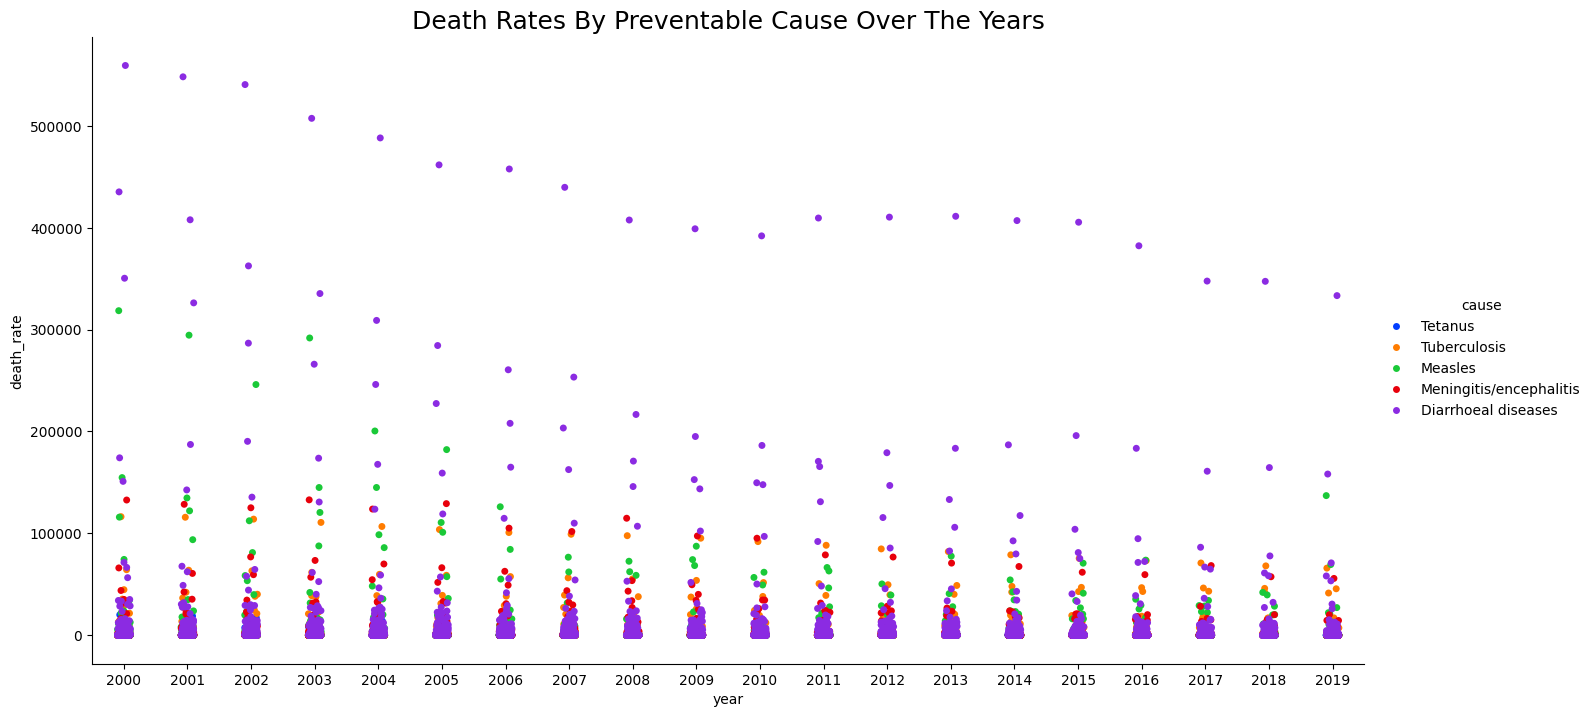

In [19]:
plt.figure(figsize=(15,5))
sns.catplot(data=year_cause_deaths,x='year',y='death_rate',hue='cause',height=7,aspect=2,palette='bright')
plt.title('Death Rates By Preventable Cause Over The Years',fontsize=18)

### Cause-Deaths

#### 1. Percentage of deaths by cause in total deaths

In [20]:
cause_total_deaths = deaths.groupby(['cause'])['death_rate'].sum().reset_index().sort_values('death_rate',ascending=False)# grouping death_rate by cause
cause_total_deaths['death_rate'] = pd.to_numeric(cause_total_deaths['death_rate']) # converting float to integer
cause_total_deaths['death_rate']= round(cause_total_deaths['death_rate'],2)        # rounding death_rate to 2 decimals
cause_total_deaths

,cause,death_rate
10,Prematurity,47241251.34
0,Acute lower respiratory infections,45770683.34
9,Other Group 1 and Other noncommunicable (neona...,43556803.55
3,Diarrhoeal diseases,31707437.99
1,Birth asphyxia and birth trauma,31520062.67
6,Malaria,22794623.17
2,Congenital anomalies,17578778.96
5,Injuries,11649351.63
11,Sepsis and other infectious conditions of the ...,9013041.21
7,Measles,8870934.00


Text(0.5, 1.0, '% Of Deaths By Cause')

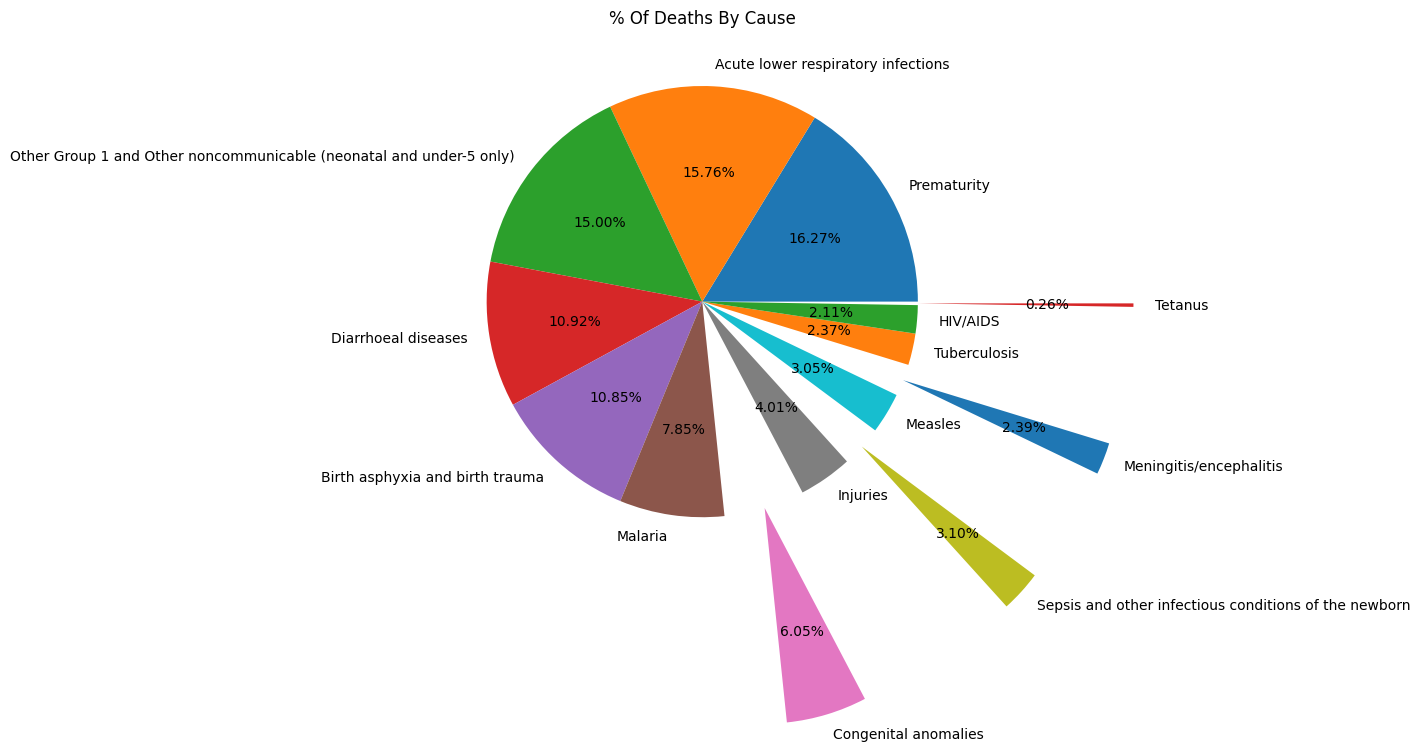

In [21]:
plt.figure(figsize=(10,7))
plt.pie(x='death_rate',data=cause_total_deaths,labels='cause',autopct="%2.2f%%",explode=[0,0,0,0,0,0,1,0,1,0,1,0,0,1])
plt.title("% Of Deaths By Cause")

##### Over all the years, higher numbers of deaths have been caused by Prematurity followed by Acute lower respiratory infections(ALRI) and Other Group 1 and Other noncommunicable (neonatal and under-5 only). The lowest number of deaths have been caused by Tetanus.

#### 2. Death rate trend of each cause over the years

In [22]:
cause_year_deaths = deaths.groupby(['year','cause'])['death_rate'].sum().reset_index()
cause_year_deaths['death_rate'] = pd.to_numeric(cause_year_deaths['death_rate'])
cause_year_deaths['death_rate'] = round(cause_year_deaths['death_rate'],2)
cause_year_deaths

,year,cause,death_rate
0,2000,Acute lower respiratory infections,3291253.05
1,2000,Birth asphyxia and birth trauma,2003623.28
2,2000,Congenital anomalies,905124.10
3,2000,Diarrhoeal diseases,2495017.78
4,2000,HIV/AIDS,491777.55
...,...,...,...
275,2019,Other Group 1 and Other noncommunicable (neona...,1567656.82
276,2019,Prematurity,1876057.09
277,2019,Sepsis and other infectious conditions of the ...,357869.96
278,2019,Tetanus,16466.20


Text(0.5, 1.0, 'Death Rate Trend Of Each Cause Over The Years')

<Figure size 900x500 with 0 Axes>

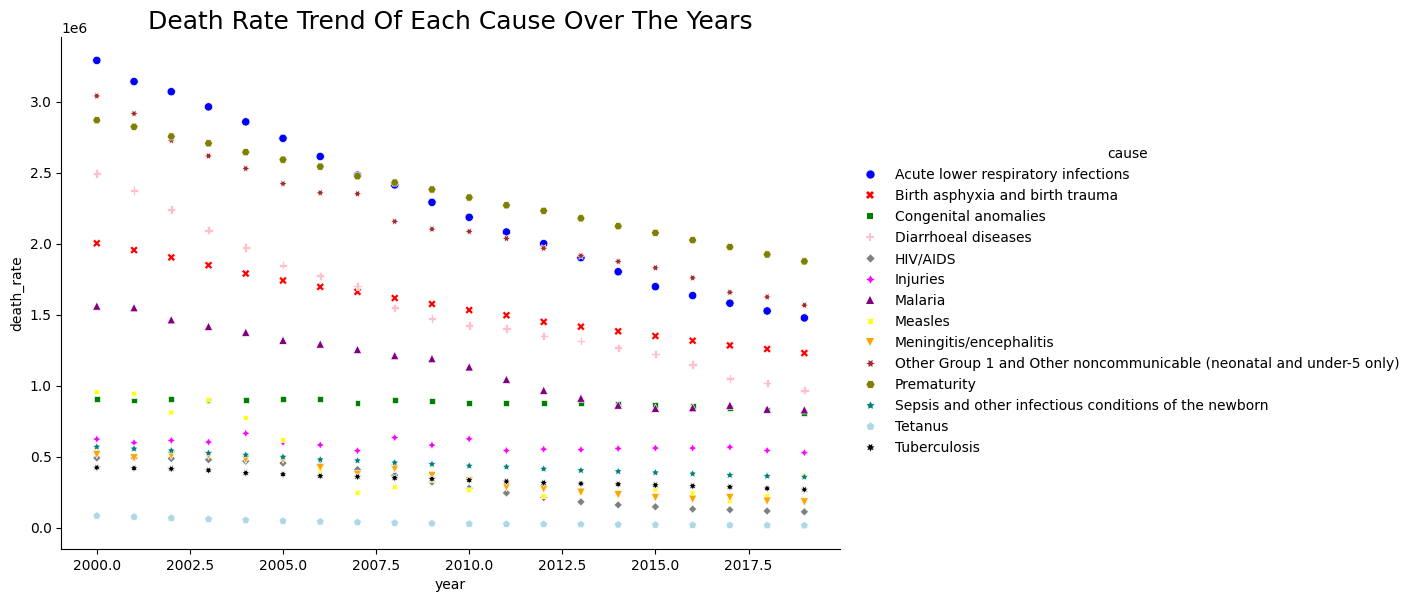

In [23]:
plt.figure(figsize=(9,5))
sns.relplot(data=cause_year_deaths,x='year',y='death_rate',hue='cause',kind='scatter',style='cause',aspect=1.5,height=6,
            palette=['blue','red','green','pink','gray','magenta','purple','yellow','orange','brown','olive','teal','lightblue','black'])
plt.title('Death Rate Trend Of Each Cause Over The Years',fontsize=18)


#### 3. Highest death rate by each cause

In [24]:
cause_max_deaths = deaths.groupby('cause')['death_rate'].max().reset_index().sort_values('death_rate',ascending=False)
cause_max_deaths

,cause,death_rate
6,Malaria,764140.30
9,Other Group 1 and Other noncommunicable (neona...,667922.10
0,Acute lower respiratory infections,663216.70
10,Prematurity,595068.90
3,Diarrhoeal diseases,559274.00
1,Birth asphyxia and birth trauma,388137.60
7,Measles,318581.00
4,HIV/AIDS,223462.50
2,Congenital anomalies,137793.20
5,Injuries,133578.30


Text(0.5, 1.0, 'Max Death Rate By Each Cause')

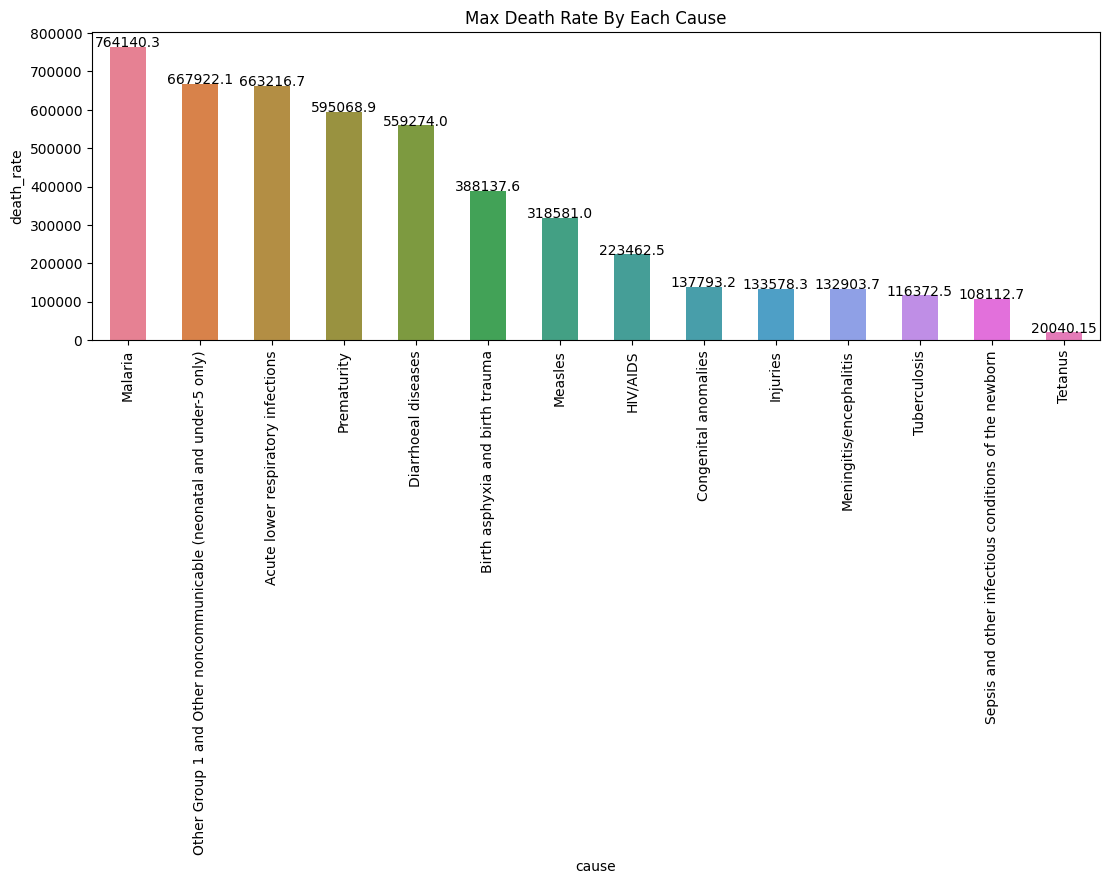

In [25]:
plt.figure(figsize=(13,4))
b = sns.barplot(data=cause_max_deaths,x='cause',y='death_rate',hue='cause',width=0.5,dodge=False)
plt.xticks(rotation=90)
for index,data in enumerate(cause_max_deaths['death_rate']):
    plt.text(x=index,y=data,s=f"{data}",ha='center')
plt.title("Max Death Rate By Each Cause")

##### Over the years 2000-2019 highest death rate is caused by Malaria 7,64,140.3

### Region-Deaths

#### 1. Which region and cause has the highest overall death rates

In [26]:
regional_deaths = deaths.groupby(['year','who_region','cause'])['death_rate'].sum().reset_index()
regional_deaths['death_rate'] = round(regional_deaths['death_rate'],2)
regional_deaths

,year,who_region,cause,death_rate
0,2000,Africa,Acute lower respiratory infections,1326433.33
1,2000,Africa,Birth asphyxia and birth trauma,556207.64
2,2000,Africa,Congenital anomalies,111520.98
3,2000,Africa,Diarrhoeal diseases,1118548.00
4,2000,Africa,HIV/AIDS,445857.99
...,...,...,...,...
1675,2019,Western Pacific,Other Group 1 and Other noncommunicable (neona...,81781.99
1676,2019,Western Pacific,Prematurity,101592.10
1677,2019,Western Pacific,Sepsis and other infectious conditions of the ...,12067.30
1678,2019,Western Pacific,Tetanus,213.80


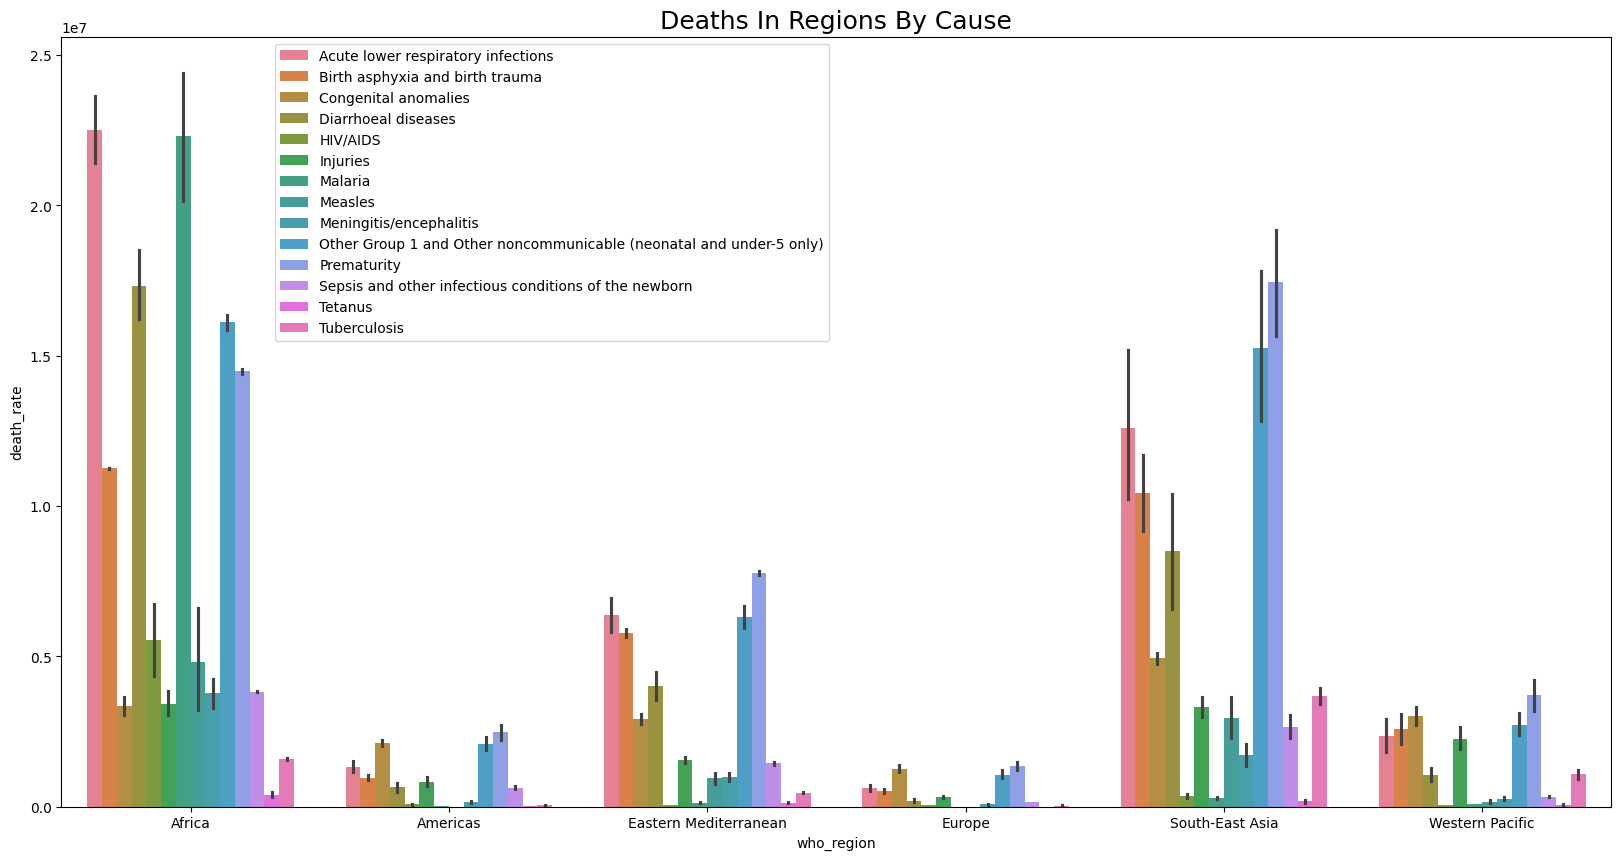

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(data=regional_deaths,x='who_region',y='death_rate',hue='cause',estimator='sum')
plt.title('Deaths In Regions By Cause',fontsize=18)
plt.legend(bbox_to_anchor=(0.5,1))

##### Africa had the highest death rates due to both Malaria and ALRTI, followed by South-East Asia due to ALRTI,Europe and America has the lowest death rates of all

#### 2. Which region and cause has the highest death rates due to vaccine preventable diseases

In [28]:
vaccine_preventable = deaths[deaths['preventable']=='Vaccine_Preventable']
regional_deaths_preventable = vaccine_preventable.groupby(['year','who_region','cause'])['death_rate'].sum().reset_index()
regional_deaths_preventable

,year,who_region,cause,death_rate
0,2000,Africa,Diarrhoeal diseases,1.118548e+06
1,2000,Africa,Measles,6.371620e+05
2,2000,Africa,Meningitis/encephalitis,2.654632e+05
3,2000,Africa,Tetanus,4.008030e+04
4,2000,Africa,Tuberculosis,7.089219e+04
...,...,...,...,...
595,2019,Western Pacific,Diarrhoeal diseases,2.578552e+04
596,2019,Western Pacific,Measles,6.042980e+03
597,2019,Western Pacific,Meningitis/encephalitis,6.329530e+03
598,2019,Western Pacific,Tetanus,2.138038e+02


<Axes: xlabel='who_region', ylabel='death_rate'>

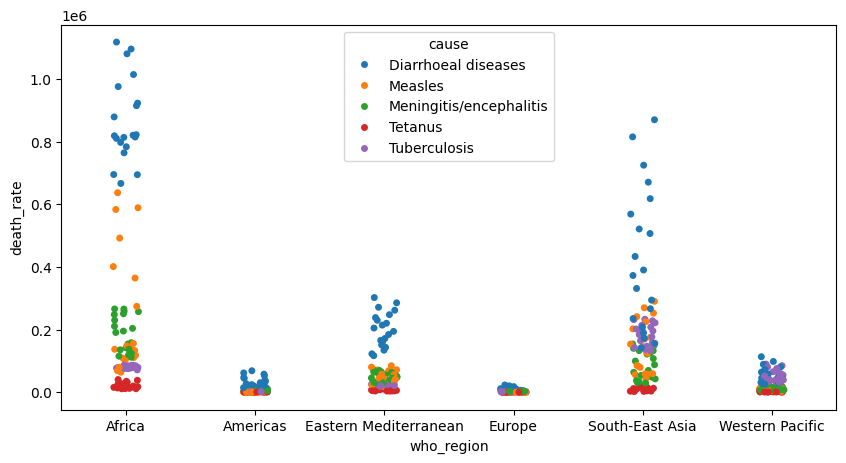

In [29]:
plt.figure(figsize=(10,5))
sns.stripplot(data=regional_deaths_preventable,x='who_region',y='death_rate',hue='cause')

##### Africa seems to have the highest death rates by vaccine preventable diseases followed by south east asia, Eastern Mediterranean,western pacific, and lastly Europe and America
##### Death rates are mostly due to Diarrhoeal disease and  Measles.
##### Tetanus have always been the cause for the least death rates

#### 3. Which region has the highest decrease in death rates over the years

In [30]:
reginal_deaths_by_year = deaths.groupby(['who_region','year'])['death_rate'].sum().reset_index()
reginal_deaths_by_year

,who_region,year,death_rate
0,Africa,2000,7.961399e+06
1,Africa,2001,7.838593e+06
2,Africa,2002,7.644273e+06
3,Africa,2003,7.622924e+06
4,Africa,2004,7.320326e+06
...,...,...,...
115,Western Pacific,2015,6.693300e+05
116,Western Pacific,2016,6.316226e+05
117,Western Pacific,2017,5.950883e+05
118,Western Pacific,2018,5.602840e+05


<Axes: xlabel='who_region', ylabel='death_rate'>

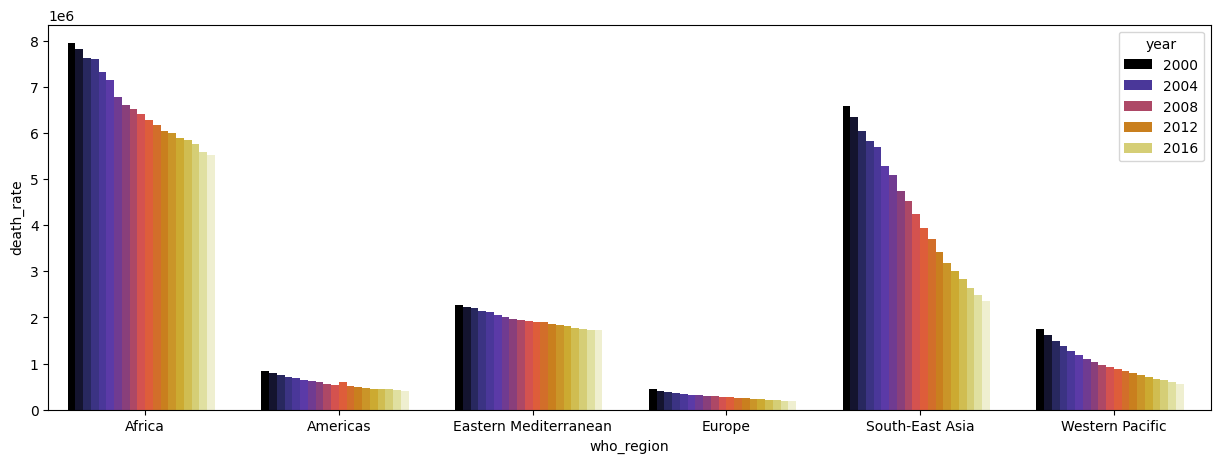

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(data=reginal_deaths_by_year,x='who_region',y='death_rate',hue='year',errorbar=('ci',False),palette='CMRmap')

##### Over the years 2000 to 2019 highest decrease in death rates can be seen in South-East Asia region compared to other regions

#### 4. Which region has the highest number of under 5 mortality rates by cause type(take the average)

Text(0.5, 1.0, 'Avg Death Rate By Type Of Cause')

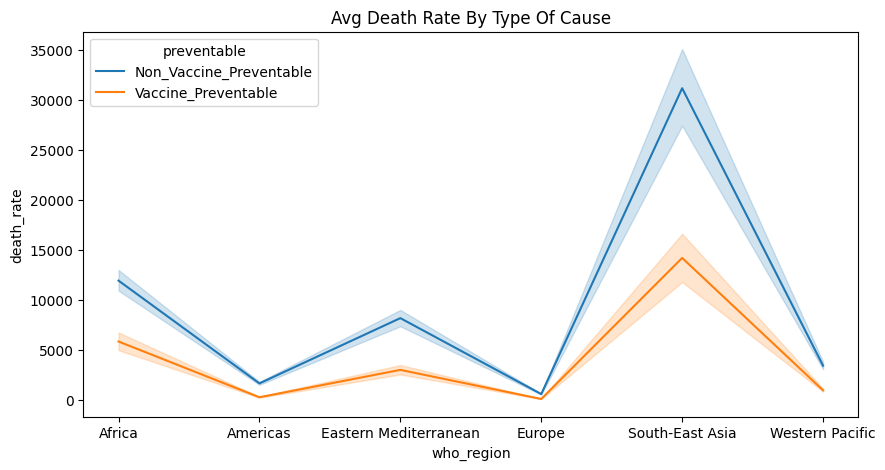

In [32]:
plt.figure(figsize=(10,5))
sns.lineplot(data=deaths,x='who_region',y='death_rate',hue='preventable',estimator='mean')
plt.title('Avg Death Rate By Type Of Cause')

##### South East Asia seems to have the highest under 5 mortality rates overall when the average is taken.
##### Average is taken as the population is different for all the regions.

#### 5. Look for South east region death rate distribution

In [33]:
south_region = deaths[deaths['who_region']=='South-East Asia']
south_region

,indicator,year,country,who_region,income_group,cause,death_rate,preventable
80,Number of under-five deaths - by cause,2000,NaN,South-East Asia,NaN,Birth asphyxia and birth trauma,388137.6000,Non_Vaccine_Preventable
81,Number of under-five deaths - by cause,2001,NaN,South-East Asia,NaN,Birth asphyxia and birth trauma,374876.0000,Non_Vaccine_Preventable
82,Number of under-five deaths - by cause,2002,NaN,South-East Asia,NaN,Birth asphyxia and birth trauma,361594.9000,Non_Vaccine_Preventable
83,Number of under-five deaths - by cause,2003,NaN,South-East Asia,NaN,Birth asphyxia and birth trauma,346720.1000,Non_Vaccine_Preventable
84,Number of under-five deaths - by cause,2004,NaN,South-East Asia,NaN,Birth asphyxia and birth trauma,330953.1000,Non_Vaccine_Preventable
...,...,...,...,...,...,...,...,...
55575,Number of under-five deaths - by cause,2015,Timor-Leste,South-East Asia,Lower middle income,Acute lower respiratory infections,280.4638,Non_Vaccine_Preventable
55576,Number of under-five deaths - by cause,2016,Timor-Leste,South-East Asia,Lower middle income,Acute lower respiratory infections,275.2645,Non_Vaccine_Preventable
55577,Number of under-five deaths - by cause,2017,Timor-Leste,South-East Asia,Lower middle income,Acute lower respiratory infections,260.4883,Non_Vaccine_Preventable
55578,Number of under-five deaths - by cause,2018,Timor-Leste,South-East Asia,Lower middle income,Acute lower respiratory infections,256.9266,Non_Vaccine_Preventable


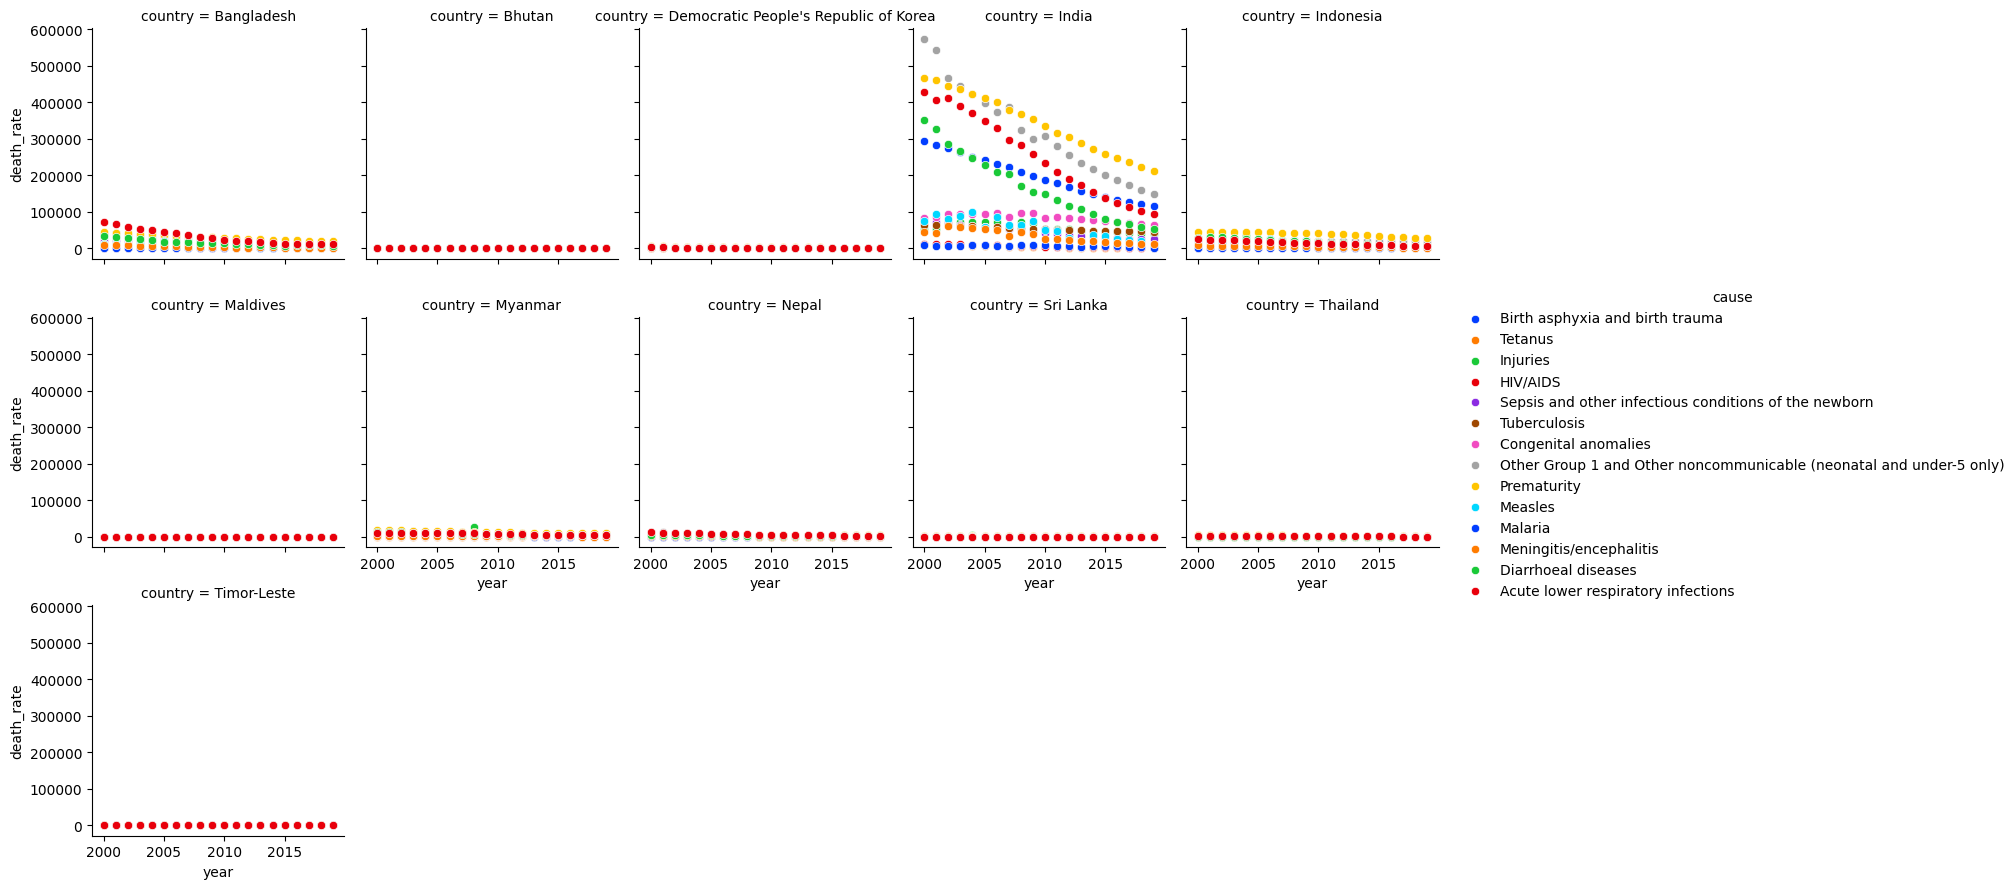

In [34]:
f = sns.FacetGrid(data=south_region,col='country',col_wrap=5,hue='cause',palette='bright')
f.map_dataframe(sns.scatterplot,x='year',y='death_rate')
f.add_legend()

##### India has the highest distribution of deathrate compared to other all countries
##### However India's population is higher than all the other countries population

#### 6. Look into India's death rate data

In [35]:
india = deaths[deaths['country']=='India']
india  = india.groupby(['country','cause'])['death_rate'].sum().reset_index().sort_values('death_rate',ascending=False)
india

,country,cause,death_rate
10,India,Prematurity,6.835331e+06
9,India,Other Group 1 and Other noncommunicable (neona...,6.387380e+06
0,India,Acute lower respiratory infections,5.043821e+06
1,India,Birth asphyxia and birth trauma,3.935937e+06
3,India,Diarrhoeal diseases,3.361372e+06
2,India,Congenital anomalies,1.667766e+06
5,India,Injuries,1.117644e+06
13,India,Tuberculosis,1.075076e+06
7,India,Measles,1.067124e+06
11,India,Sepsis and other infectious conditions of the ...,9.228670e+05


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Prematurity'),
  Text(1, 0, 'Other Group 1 and Other noncommunicable (neonatal and under-5 only)'),
  Text(2, 0, 'Acute lower respiratory infections'),
  Text(3, 0, 'Birth asphyxia and birth trauma'),
  Text(4, 0, 'Diarrhoeal diseases'),
  Text(5, 0, 'Congenital anomalies'),
  Text(6, 0, 'Injuries'),
  Text(7, 0, 'Tuberculosis'),
  Text(8, 0, 'Measles'),
  Text(9, 0, 'Sepsis and other infectious conditions of the newborn'),
  Text(10, 0, 'Meningitis/encephalitis'),
  Text(11, 0, 'Malaria'),
  Text(12, 0, 'HIV/AIDS'),
  Text(13, 0, 'Tetanus')])

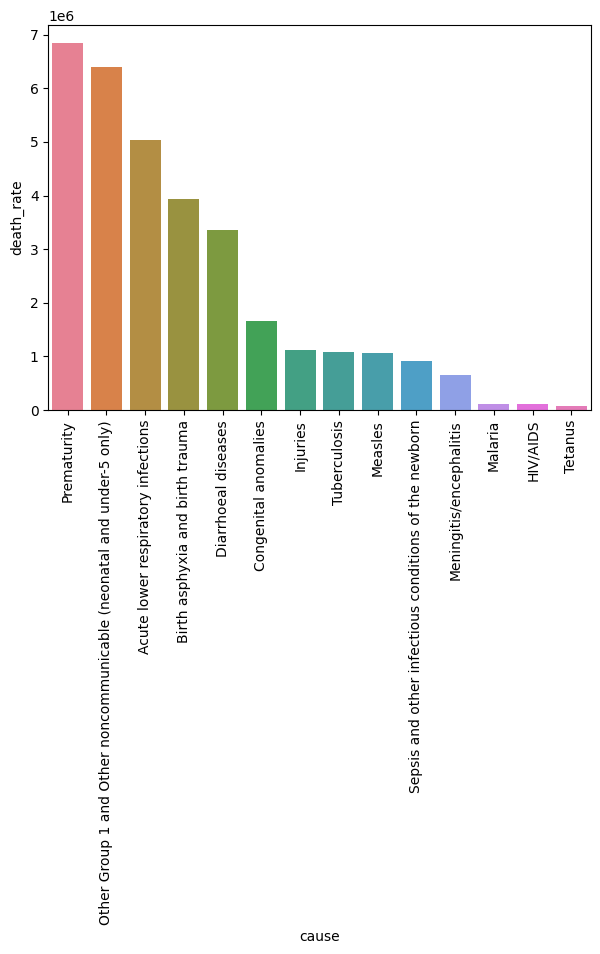

In [36]:
sns.barplot(data=india,x='cause',y='death_rate',hue='cause')
plt.xticks(rotation=90)

##### In India the highest death rate is due to prematurity followed by other non communicable diseases followed by birth asphyxia.
##### Common non communicable diseases include anaemia, asthma, cancers, heart diseases

### Income group-Deaths

#### 1. Which income group has highest death rates

([0, 1, 2, 3],
 [Text(0, 0, 'Low income'),
  Text(1, 0, 'Upper middle income'),
  Text(2, 0, 'Lower middle income'),
  Text(3, 0, 'High income')])

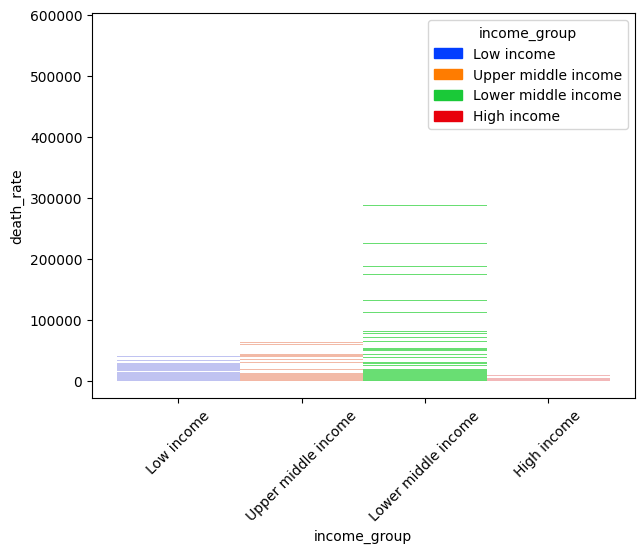

In [44]:
sns.histplot(data=deaths,x='income_group',y='death_rate',hue='income_group',palette='bright')
plt.xticks(rotation=45)

##### Lower middle income group has highest death rates followed by upper middle income group 

#### 2. Death rates in the regions by WHO income group

<Figure size 1000x500 with 0 Axes>

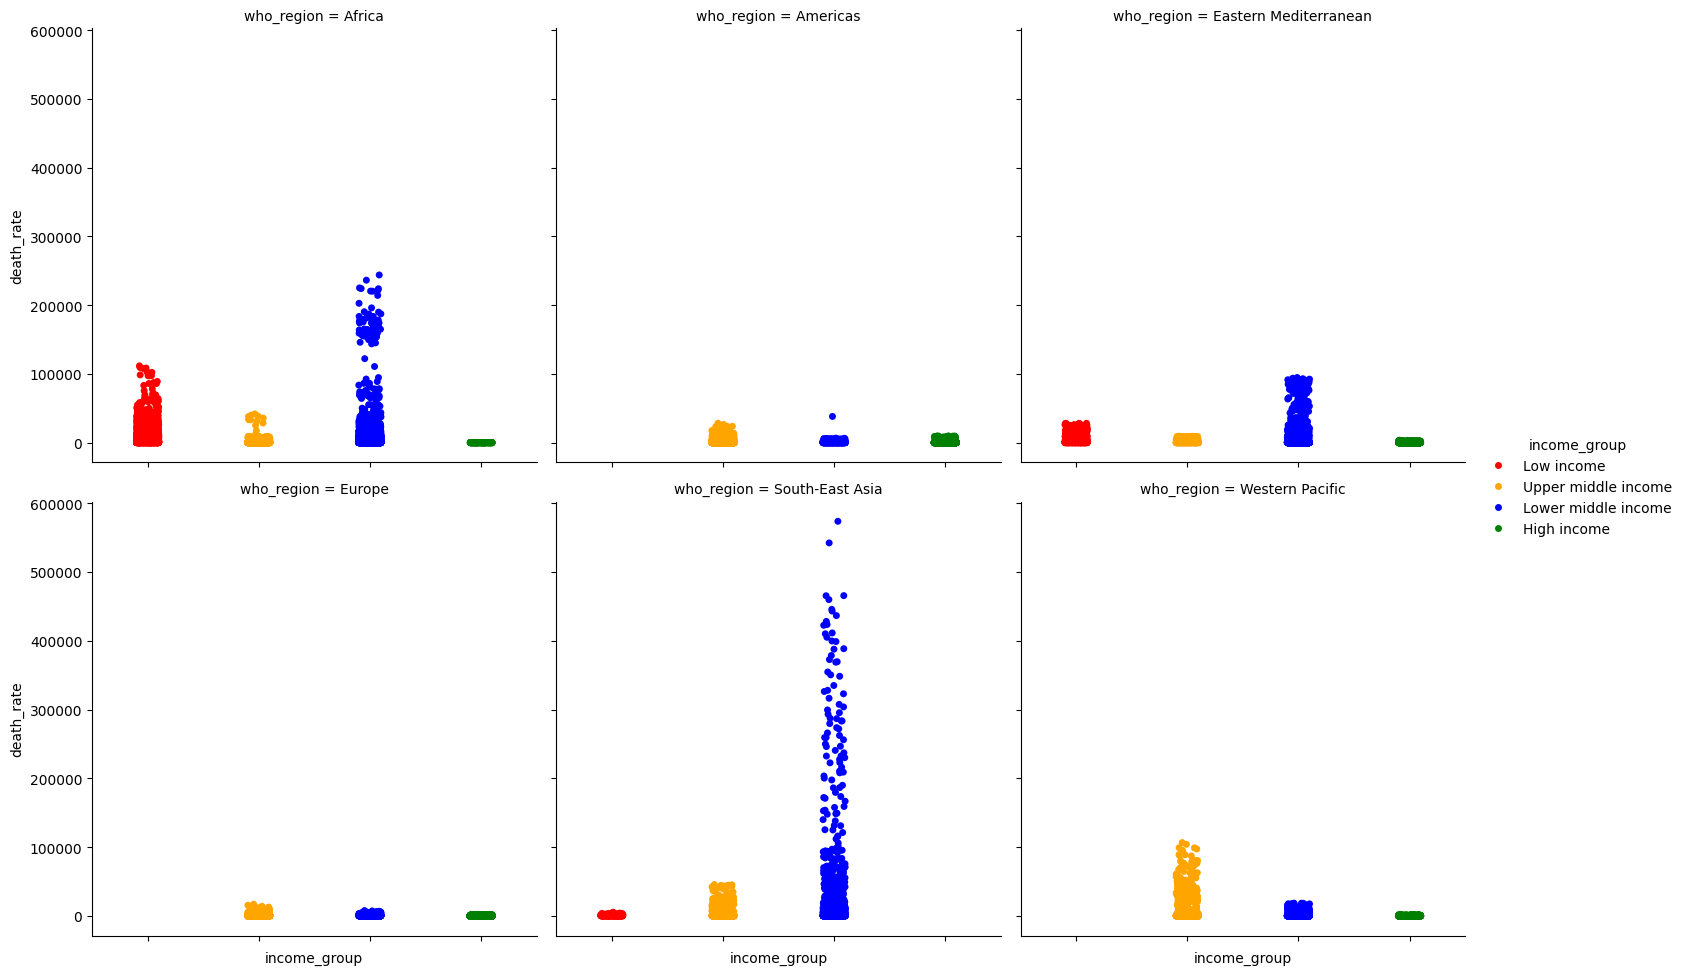

In [39]:
plt.figure(figsize=(10,5))
p = sns.catplot(data=deaths,x='income_group',hue='income_group',y='death_rate',col='who_region',col_wrap=3,
           palette=['red','orange','blue','green'])
p.set_xticklabels(rotation=90)
plt.show(p)


##### 1. In African, South-East Asia, and Eastern Mediterian regions most deaths have occurred in the Lower middle-income group. South-East Asia has             the most deaths in the Lower middle-income group.
##### 2. In all other regions most deaths have occurred in the Upper middle-income group people.
##### 3. Southeast Asia does not have a high-income group in death rates. Europe, the Americas, and the Western Pacific regions does not have the low-income group in death rates according to the World Bank income groups.
##### 4. In low-income group Africa and Eastern Mediterranean regions have the highest death rates

#### 3. Are the vaccines affordable by low income group. 

In [40]:
vaccine_preventable_data = deaths[deaths['preventable'] == 'Vaccine_Preventable']
vaccine_preventable_data= vaccine_preventable_data[['preventable','year','income_group','death_rate']]
vaccine_preventable_data

,preventable,year,income_group,death_rate
4000,Vaccine_Preventable,2000,NaN,20040.150
4001,Vaccine_Preventable,2001,NaN,18818.680
4002,Vaccine_Preventable,2002,NaN,17266.540
4003,Vaccine_Preventable,2003,NaN,15696.630
4004,Vaccine_Preventable,2004,NaN,14004.790
...,...,...,...,...
51995,Vaccine_Preventable,2015,Lower middle income,2285.684
51996,Vaccine_Preventable,2016,Lower middle income,2091.532
51997,Vaccine_Preventable,2017,Lower middle income,1892.406
51998,Vaccine_Preventable,2018,Lower middle income,1960.905


Text(0.5, 1.0, 'Vaccine Preventable Cause Death Rates By Income Group')

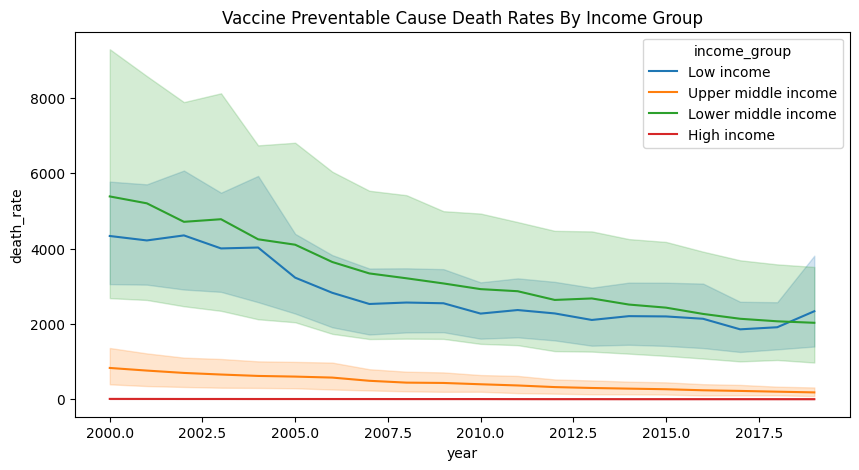

In [41]:
plt.figure(figsize=(10,5))
sns.lineplot(data=vaccine_preventable_data,x='year',y='death_rate',hue='income_group')
plt.title('Vaccine Preventable Cause Death Rates By Income Group')

##### Over all the years 2000-19 lower-middle income group has the highest death rate among all other groups
##### Low income group death rate is increased in 2019 compared to 2018
##### Lower middle income group death rate had decreased significantly over the years

#### 4. Look into India's death rates by income group

In [42]:
india = deaths[deaths['country'] == 'India']
india

,indicator,year,country,who_region,income_group,cause,death_rate,preventable
1680,Number of under-five deaths - by cause,2000,India,South-East Asia,Lower middle income,Birth asphyxia and birth trauma,293153.90,Non_Vaccine_Preventable
1681,Number of under-five deaths - by cause,2001,India,South-East Asia,Lower middle income,Birth asphyxia and birth trauma,283454.10,Non_Vaccine_Preventable
1682,Number of under-five deaths - by cause,2002,India,South-East Asia,Lower middle income,Birth asphyxia and birth trauma,273685.90,Non_Vaccine_Preventable
1683,Number of under-five deaths - by cause,2003,India,South-East Asia,Lower middle income,Birth asphyxia and birth trauma,262320.60,Non_Vaccine_Preventable
1684,Number of under-five deaths - by cause,2004,India,South-East Asia,Lower middle income,Birth asphyxia and birth trauma,249890.40,Non_Vaccine_Preventable
...,...,...,...,...,...,...,...,...
53695,Number of under-five deaths - by cause,2015,India,South-East Asia,Lower middle income,Acute lower respiratory infections,138043.90,Non_Vaccine_Preventable
53696,Number of under-five deaths - by cause,2016,India,South-East Asia,Lower middle income,Acute lower respiratory infections,124900.20,Non_Vaccine_Preventable
53697,Number of under-five deaths - by cause,2017,India,South-East Asia,Lower middle income,Acute lower respiratory infections,111829.50,Non_Vaccine_Preventable
53698,Number of under-five deaths - by cause,2018,India,South-East Asia,Lower middle income,Acute lower respiratory infections,101697.30,Non_Vaccine_Preventable


<Axes: xlabel='country', ylabel='death_rate'>

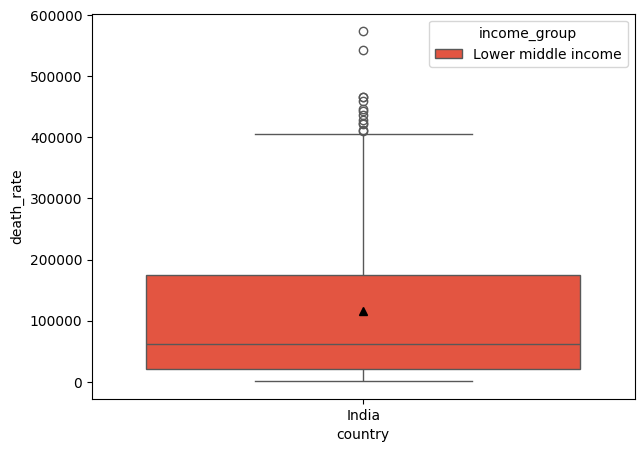

In [43]:
sns.boxplot(data=india,x='country',y='death_rate',hue='income_group',palette='CMRmap',showmeans=True,
            meanprops={'markerfacecolor':'black','markeredgecolor':'black'})

##### India only has lower middle income group




## Conclusion
The comprehensive analysis of under-5 child mortality rates from 2000 to 2019 shows significant progress in reducing death rates over the years. By 2019, the global death rate had decreased by an impressive 46.59% compared to the year 2000. These achievements can be attributed to advancements in healthcare, including the development of life-saving vaccines to prevent diseases, which have collectively contributed to a reduction in child mortality rates. While commendable progress has been made across all regions, it is evident that challenges persist, particularly in Africa where child mortality rates remain comparatively high in 2019. The South-East region, for instance, has witnessed a substantial decrease in under-5 child mortality rates, reflecting the positive impact of healthcare interventions and improved access to essential services. In conclusion, the journey from 2000 to 2019 has witnessed profound improvements in child mortality outcomes.